In [189]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt
import calendar

In [190]:
# importing the dataset 
df=pd.read_csv(r"C:\Users\Pratham Sankhala\Desktop\Unemployment_Rate_upto_11_2020.csv")
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [191]:
# updating column names
df.columns=["state","date","frequency","estimated unemployment rate","estimated employed","estimated labour participation rate","region", "longitude", "latitude"]

In [192]:
# seeing top 5 values of the dataset
df.head()

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [193]:
# creating a new column for month
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['month_int'] =  df['date'].dt.month
df['month'] =  df['month_int'].apply(lambda x: calendar.month_abbr[x])
df.head()

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude,month_int,month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


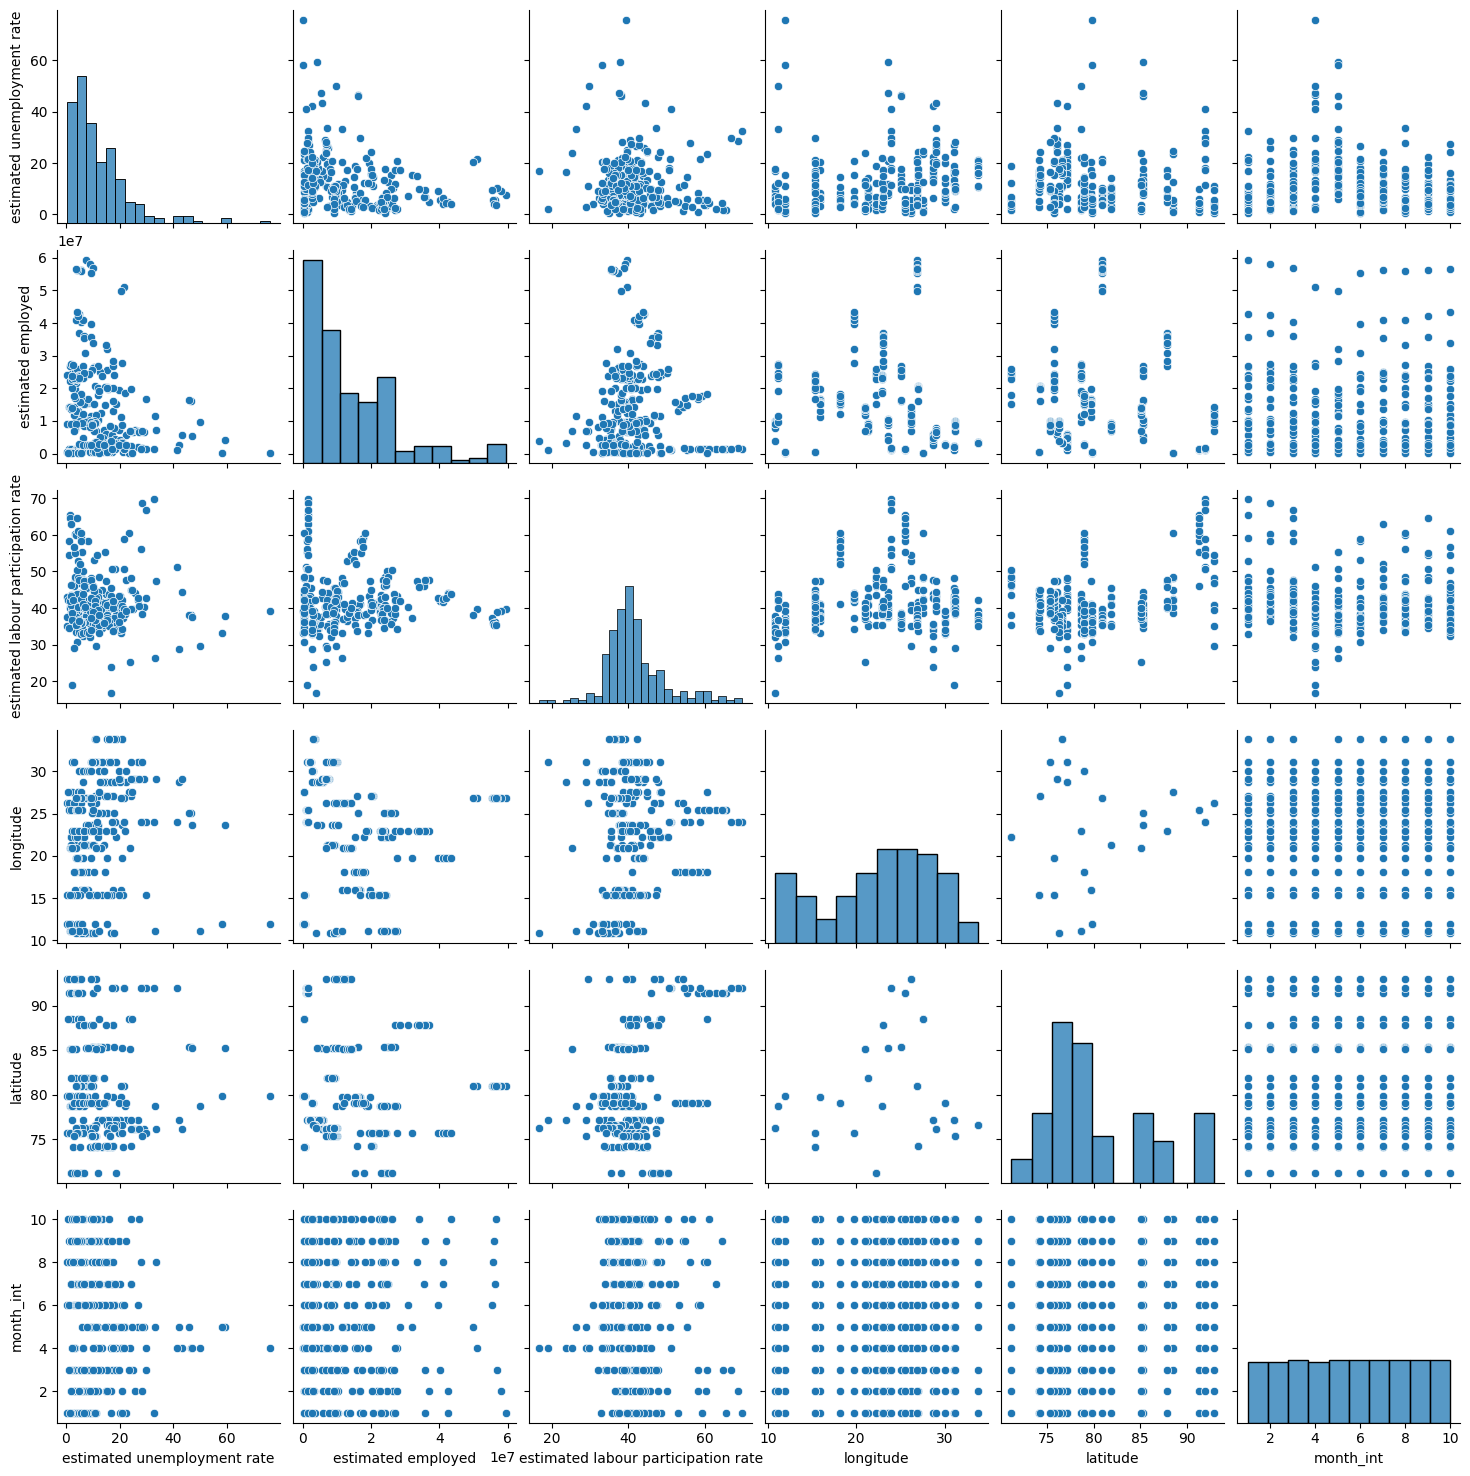

In [194]:
sns.pairplot(df)

In [195]:
# grouping the data according to months

UER =  df.groupby(["month"])[['estimated unemployment rate', "estimated employed", "estimated labour participation rate"]].mean()
UER = pd.DataFrame(UER).reset_index()

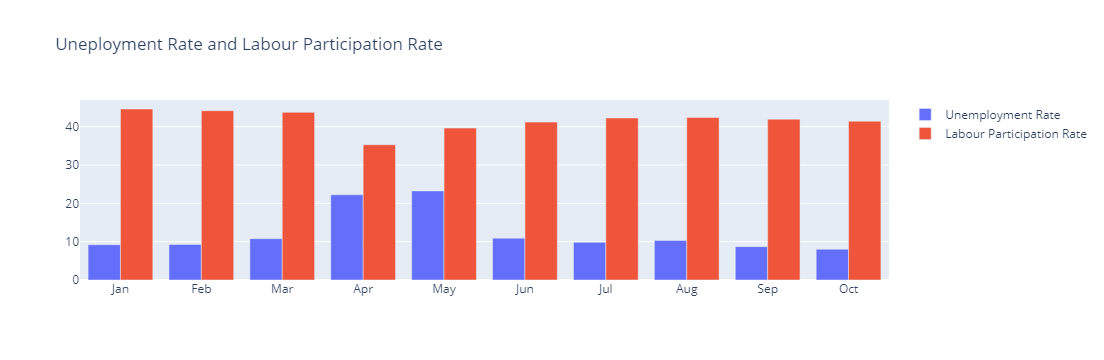

In [196]:
month = UER.month
unemployment_rate = UER["estimated unemployment rate"]
labour_participation_rate = UER["estimated labour participation rate"]

fig = go.Figure()

fig.add_trace(go.Bar(x = month, y = unemployment_rate, name= "Unemployment Rate"))
fig.add_trace(go.Bar(x = month, y = labour_participation_rate, name= "Labour Participation Rate"))

fig.update_layout(title="Uneployment Rate and Labour Participation Rate",
                  xaxis={"categoryorder":"array", "categoryarray":["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"]})

fig.show()


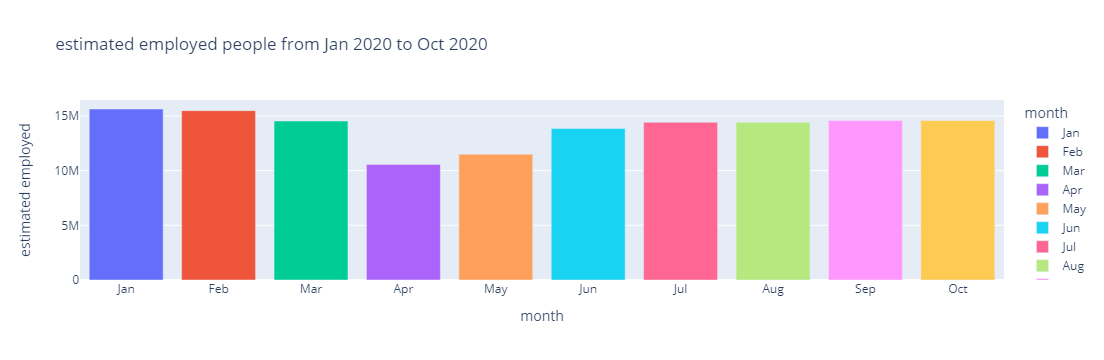

In [197]:
fig = px.bar(UER, x='month',y='estimated employed', color='month',
             category_orders = {"month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"]}, 
             title='estimated employed people from Jan 2020 to Oct 2020')

fig.show()

In [198]:
#state wise analysis
state = df.groupby(["state"])[["estimated unemployment rate", "estimated employed", "estimated labour participation rate"]].mean()
state = pd.DataFrame(state).reset_index()

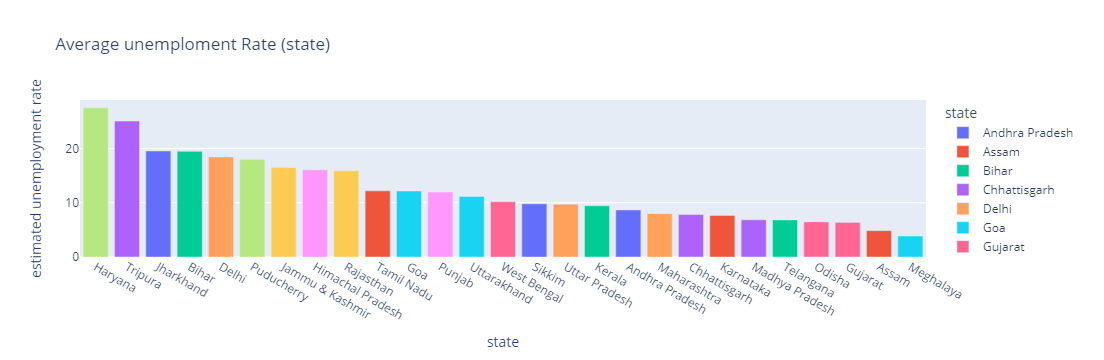

In [199]:
# Bar plot for average unemployment rate
fig = px.bar(state, x='state', y="estimated unemployment rate", color="state", title="Average unemploment Rate (state)")
fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.show()

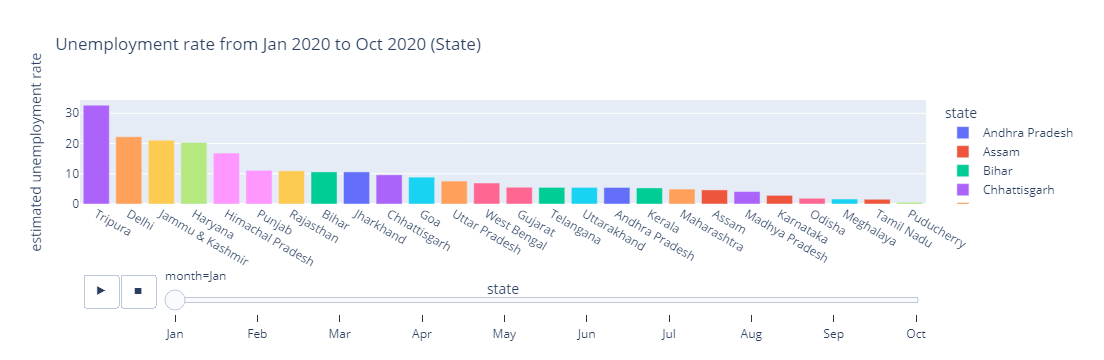

In [200]:
# bar plot for monthly unemployment rate

fig = px.bar(df, x='state',y='estimated unemployment rate', animation_frame = 'month', color='state',
            title='Unemployment rate from Jan 2020 to Oct 2020 (State)')

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"]=1500

fig.show()

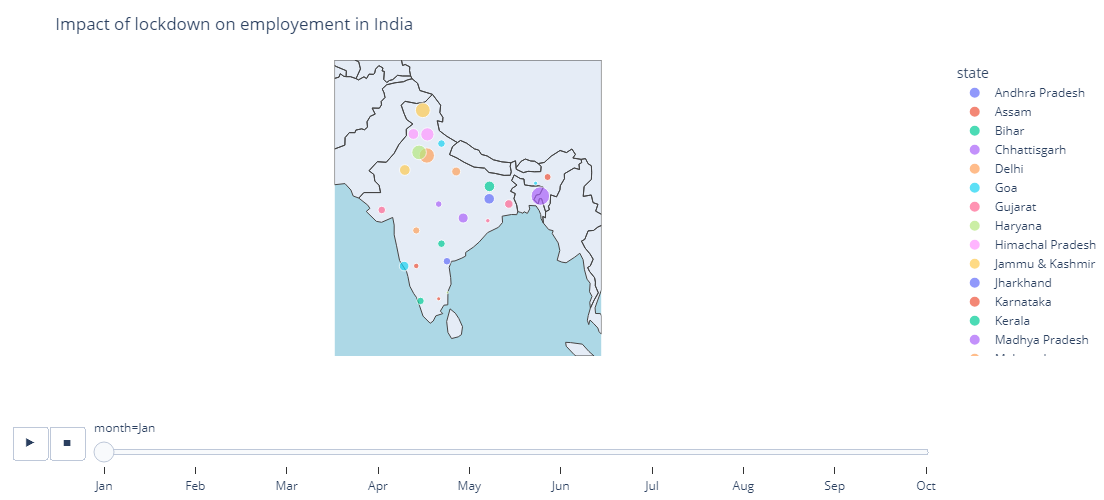

In [215]:
fig = px.scatter_geo(df,'longitude', 'latitude', color="state",
                     hover_name="state", size="estimated unemployment rate",
                     animation_frame="month",scope='asia',title='Impact of lockdown on employement in India')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500

fig.update_geos(lataxis_range=[5,40], lonaxis_range=[65, 100],oceancolor="lightblue",
    showocean=True)
fig.update_layout(width=1100, height=500, margin=dict(l=0, r=50, t=60, b=50))
fig.show()

In [202]:
df.region.unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

In [203]:
region = df.groupby(["region"])[['estimated unemployment rate', "estimated employed", "estimated labour participation rate"]].mean()
region = pd.DataFrame(region).reset_index()

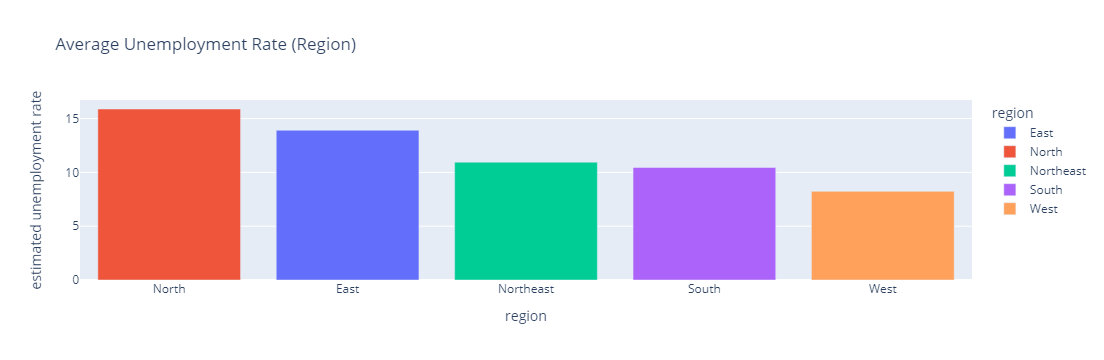

In [204]:
# bar plot average unemployment rate

fig = px.bar(region, x="region", y="estimated unemployment rate", color="region", title="Average Unemployment Rate (Region)")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [205]:
unemployment = df.groupby(['region','state'])['estimated unemployment rate'].mean().reset_index()
unemployment.head()

,region,state,estimated unemployment rate
0,East,Bihar,19.471
1,East,Jharkhand,19.539
2,East,Odisha,6.462
3,East,West Bengal,10.192
4,North,Delhi,18.414


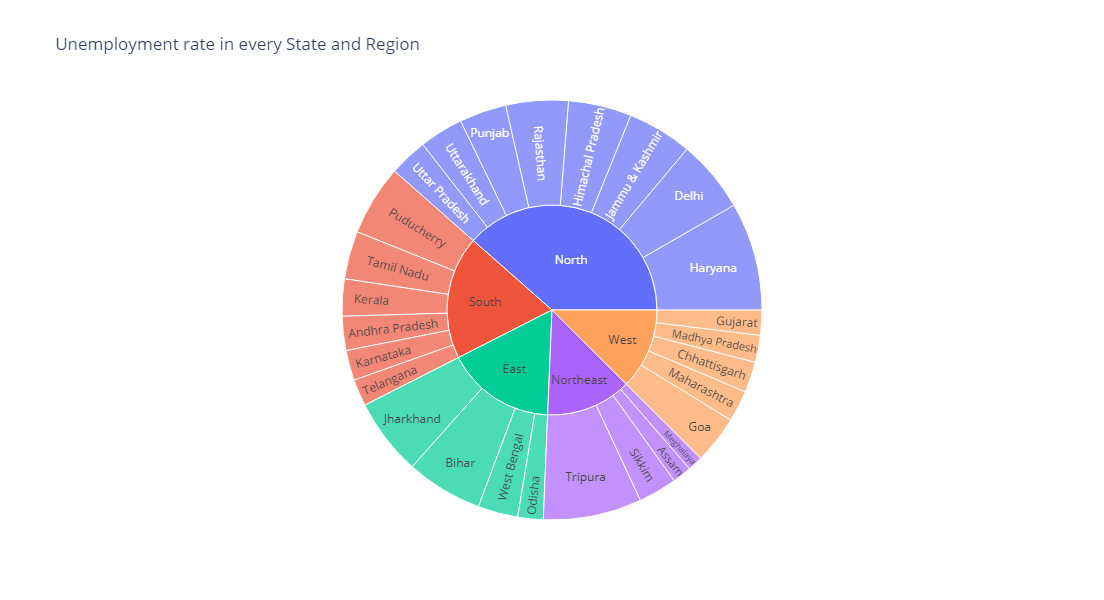

In [211]:
fig = px.sunburst(unemployment, path=['region','state'], values='estimated unemployment rate',
                  title= 'Unemployment rate in every State and Region', height=600)
fig.show()